### Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

### Using Google Collab

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# % cd /content/gdrive/MyDrive/

In [4]:
# % cd Final_project

In [5]:
# !unzip -q /content/gdrive/MyDrive/Final_project/join_all_2020.rar

In [6]:
# ! wget join_all_2020.csv

### Load Data

In [7]:
data = pd.read_csv('join_all_2020.csv')

Melihat representasi data

In [8]:
data.head()

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,0,2020-01-01,0034b3dced3e565a43438bdfb5447e7321fea65388b398...,835247001,0.033881,2,835247,Supernova,265,Dress,...,Womens Everyday Collection,1013,Dresses Ladies,Calf-length dress in a softly draping viscose ...,1.0,1.0,ACTIVE,Regularly,42.0,36d5f1b9782c7e1c23a87442136ee0353cc4ac92f6987b...
1,1,2020-01-01,00410b91d62eefa76958fa5cac12f5daa7cfc0556e417d...,802930002,0.067780,2,802930,New York pile jacket,262,Jacket,...,Divided Collection,1007,Outdoor,"Pile jacket with a wide collar, zip down the f...",NaN,NaN,ACTIVE,NONE,53.0,56e5d3525bfdbd7f568ef62da6e771f4ed31cb87716449...
2,2,2020-01-01,00410b91d62eefa76958fa5cac12f5daa7cfc0556e417d...,760084008,0.025407,2,760084,Victorville HW Pull-on TRS,272,Trousers,...,Divided Collection,1009,Trousers,Ankle-length trousers in cotton twill with a h...,NaN,NaN,ACTIVE,NONE,53.0,56e5d3525bfdbd7f568ef62da6e771f4ed31cb87716449...
3,3,2020-01-01,004b0fb384bcab2f8e1059dd5ca68c17580365ab95c05a...,804662002,0.033881,2,804662,Kendall body,253,Vest top,...,Divided Collection,1005,Jersey Fancy,Sleeveless body in jersey with a slight sheen....,NaN,NaN,PRE-CREATE,NONE,NaN,2aabb68ef3e621c1c46d77b9e5860caf2653c1357f7a8a...
4,4,2020-01-01,004b0fb384bcab2f8e1059dd5ca68c17580365ab95c05a...,801554002,0.016932,2,801554,Wheeler body,254,Top,...,Divided Collection,1005,Jersey Fancy,Fitted body in jersey containing glittery thre...,NaN,NaN,PRE-CREATE,NONE,NaN,2aabb68ef3e621c1c46d77b9e5860caf2653c1357f7a8a...


Info masing - masing kolom pada tabel

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980132 entries, 0 to 10980131
Data columns (total 36 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   t_dat                         object 
 2   customer_id                   object 
 3   article_id                    int64  
 4   price                         float64
 5   sales_channel_id              int64  
 6   product_code                  int64  
 7   prod_name                     object 
 8   product_type_no               int64  
 9   product_type_name             object 
 10  product_group_name            object 
 11  graphical_appearance_no       int64  
 12  graphical_appearance_name     object 
 13  colour_group_code             int64  
 14  colour_group_name             object 
 15  perceived_colour_value_id     int64  
 16  perceived_colour_value_name   object 
 17  perceived_colour_master_id    int64  
 18  perceived_colour_mas

Dropping columns `unnamed:0`

In [10]:
data.drop('Unnamed: 0', axis=1, inplace=True)

Memanfaatkan data yang penjualannya online

In [11]:
data = data[data['sales_channel_id']==2]

Karena dibawah ini merupakan analisa RFM, maka kolom yang dibutuhkan hanya terdiri dari : `t_dat` , `customer_id` , `price`

In [12]:
data_new = data[['t_dat','customer_id','price']]

Melihat representasi data untuk analisa RFM

In [13]:
data_new.head()

,t_dat,customer_id,price
0,2020-01-01,0034b3dced3e565a43438bdfb5447e7321fea65388b398...,0.033881
1,2020-01-01,00410b91d62eefa76958fa5cac12f5daa7cfc0556e417d...,0.067780
2,2020-01-01,00410b91d62eefa76958fa5cac12f5daa7cfc0556e417d...,0.025407
3,2020-01-01,004b0fb384bcab2f8e1059dd5ca68c17580365ab95c05a...,0.033881
4,2020-01-01,004b0fb384bcab2f8e1059dd5ca68c17580365ab95c05a...,0.016932


Melakukan agregasi data pada price, berdasarkan `t_dat` dan `customer_id` nya

In [14]:
orders = data_new.groupby(['t_dat', 'customer_id'])['price'].sum().reset_index()
orders.head()

,t_dat,customer_id,price
0,2020-01-01,0034b3dced3e565a43438bdfb5447e7321fea65388b398...,0.033881
1,2020-01-01,00410b91d62eefa76958fa5cac12f5daa7cfc0556e417d...,0.093186
2,2020-01-01,004b0fb384bcab2f8e1059dd5ca68c17580365ab95c05a...,0.160915
3,2020-01-01,005ed70ec112c857cebb66e92753a6c938004a75ae8708...,0.055898
4,2020-01-01,007a21531a3afd432f5af7fbc3ec9480686ec621ac9b49...,0.198051


Melihat before after melakukan aggregasi data

In [15]:
data_new.shape,orders.shape

((8003927, 3), (2022988, 3))

Kita lihat bagaimana kondisi data `join_all_2020.csv` , yaitu maksimum di tanggal berapa untuk data di tahun 2020 ?

In [16]:
orders['t_dat'].max()

'2020-09-22'

In [17]:
analysis_date = orders['t_dat'].max()

In [18]:
type(analysis_date)

str

In [19]:
import datetime as dt

In [20]:
analysis_date = dt.datetime(2020,9,22)

In [21]:
type(analysis_date)

datetime.datetime

In [22]:
orders['t_dat'] = pd.to_datetime(orders['t_dat'],format='%Y-%m-%d')

In [23]:
orders['date']=orders['t_dat']

In [24]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022988 entries, 0 to 2022987
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   t_dat        datetime64[ns]
 1   customer_id  object        
 2   price        float64       
 3   date         datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 61.7+ MB


### RFM Analysis

In [25]:
rfm = orders.groupby('customer_id').agg({
    't_dat': lambda x: (analysis_date - x.max()).days,
    'date': 'count',
    'price': 'sum'})
#rfm.head()
rfm.columns=["Recency","Frequency","Monetary"]


In [26]:
rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,185,1,0.093644
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,153,4,0.787593
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,7,4,0.559085
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,41,2,0.255814
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,8,1,0.076237


In [27]:
rfm[rfm['Monetary']==0]

,Recency,Frequency,Monetary
customer_id,,,


In [28]:
rfm[rfm['Recency']==0]

,Recency,Frequency,Monetary
customer_id,,,
0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf4672f30b3e622fec55,0,8,0.589915
000525e3fe01600d717da8423643a8303390a055c578ed8a97256600baf54565,0,1,0.025407
001436e2c83cda28548dd668cfc7d621d70d2baf6f6cf0684c7cc8499d0c351f,0,3,0.118576
0026ebdd70715d8fa2befa14dfed317a1ffe5451aba839a8a25af36ee78f061c,0,1,0.079593
002faf80a68267264102e08eb4f1f21a59236773e4ab9009c948433fdbad28e7,0,5,1.302593
...,...,...,...
ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf23b3c4ffdc5dcc2ebc9,0,26,3.024271
ffcd5ff3fd5b9ee6b984c143c973fd2697ca141483d381d9086f967daaee9a79,0,5,0.547322
ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac55b4c6fb955cc836b1,0,19,2.417407


### Distribusi kolom dari hasil RFM

In [29]:
import seaborn as sns

Skew recency:  0.44105729663337856


<AxesSubplot:xlabel='Recency', ylabel='Count'>

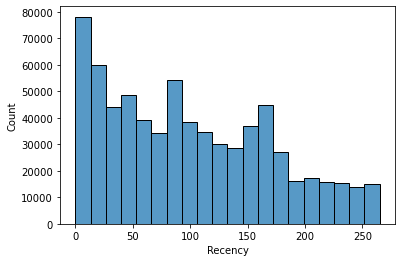

In [30]:
print('Skew recency: ',rfm.Recency.skew())
sns.histplot(data=rfm.Recency,bins=20)

Skew recency:  6.1044245758104045


<AxesSubplot:xlabel='Frequency', ylabel='Count'>

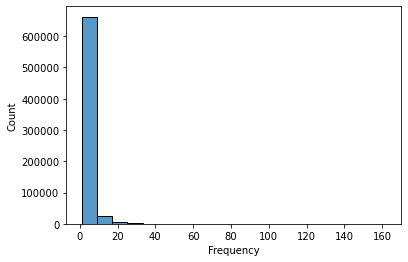

In [31]:
print('Skew recency: ',rfm.Frequency.skew())
sns.histplot(data=rfm.Frequency,bins=20)

Skew recency:  6.705709159447153


<AxesSubplot:xlabel='Monetary', ylabel='Count'>

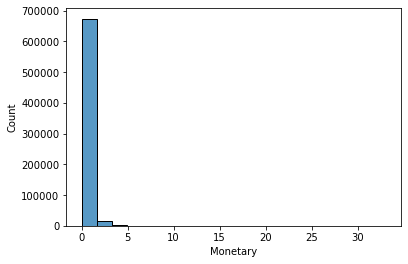

In [32]:
print('Skew recency: ',rfm.Monetary.skew())
sns.histplot(data=rfm.Monetary,bins=20)

### Normalisasi Data hasil RFM : Dengan Log 

In [33]:
rfm['Recency'] = rfm['Recency'] + 1

In [34]:
rfm_log = rfm[['Recency','Frequency','Monetary']].apply(np.log,axis=1).round(3)

In [35]:
rfm_log.describe()

,Recency,Frequency,Monetary
count,692745.000000,692745.000000,692745.000000
mean,4.182531,0.696115,-1.786854
std,1.148364,0.779196,1.173378
min,0.000000,0.000000,-6.390000
25%,3.611000,0.000000,-2.673000
50%,4.511000,0.693000,-1.827000
75%,5.050000,1.099000,-0.969000
max,5.583000,5.088000,3.499000


Skew recency:  -1.285916988325423


<AxesSubplot:xlabel='Recency', ylabel='Count'>

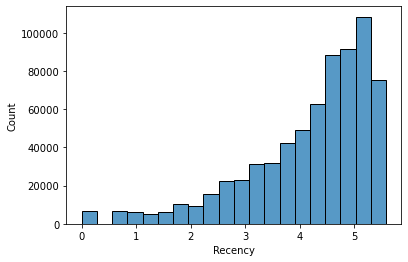

In [36]:
print('Skew recency: ',rfm_log.Recency.skew())
sns.histplot(data=rfm_log.Recency,bins=20)

Skew frequency:  0.9362300761964895


<AxesSubplot:xlabel='Frequency', ylabel='Count'>

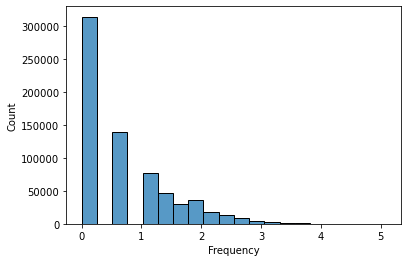

In [37]:
print('Skew frequency: ',rfm_log.Frequency.skew())
sns.histplot(data=rfm_log.Frequency,bins=20)

Skew monetary:  0.13705559945871262


<AxesSubplot:xlabel='Monetary', ylabel='Count'>

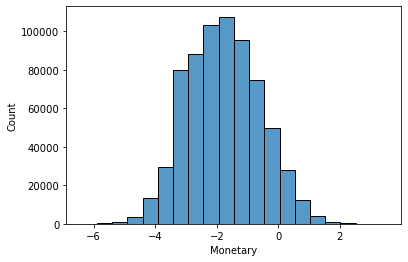

In [38]:
print('Skew monetary: ',rfm_log.Monetary.skew())
sns.histplot(data=rfm_log.Monetary,bins=20)

### Coba clustering

### Scaling : Menggunakan MinMaxScaler

In [39]:
num_scaler=MinMaxScaler()
rfm_scaled = num_scaler.fit_transform(rfm_log)

In [40]:
rfm_scaled

array([[0.93605588, 0.        , 0.40671453],
       [0.90220312, 0.27240566, 0.62200425],
       [0.37238044, 0.27240566, 0.58742037],
       ...,
       [0.90686011, 0.35220126, 0.62240874],
       [0.48504388, 0.13620283, 0.38800688],
       [0.89862081, 0.21599843, 0.47942158]])

In [41]:
k_means_per_k = [KMeans(n_clusters=k, random_state=34).fit(rfm_scaled)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in k_means_per_k]

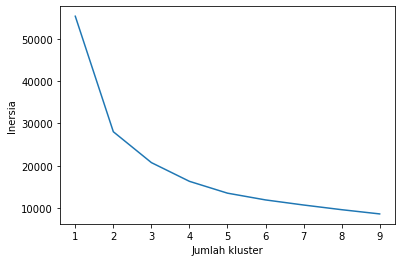

In [42]:
plt.plot(np.array([i for i in range(1,10)]), np.array(inertias))
plt.xlabel('Jumlah kluster')
plt.ylabel('Inersia')
plt.show()

#### Asumsikan menggunakan cluster  = 4

In [43]:
kmeans_model = KMeans(n_clusters=4, random_state=69, n_init=10)

In [44]:
rfm_trained_logscaled = kmeans_model.fit_predict(rfm_scaled)
rfm_trained_logscaled

array([3, 2, 1, ..., 2, 0, 2])

In [45]:
rfm['Clusters'] = rfm_trained_logscaled

In [46]:
rfm

,Recency,Frequency,Monetary,Clusters
customer_id,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,186,1,0.093644,3
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,154,4,0.787593,2
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,4,0.559085,1
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,2,0.255814,2
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,1,0.076237,0
...,...,...,...,...
ffff8f9ecdce722b5bab97fff68a6d1866492209bfe5242c50d2a10a652fb5ef,113,1,0.135542,3
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,41,3,0.374305,2
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,158,6,0.790271,2


### Hasil Visualisasi dari Clustering = 4

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

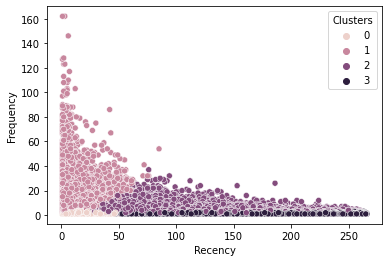

In [47]:
sns.scatterplot(x=rfm.Recency,y=rfm.Frequency,hue=rfm.Clusters)

- 0 : Recency Frequency kecil
- 1 : Recency kecil , frequency menengah hingga ke atas
- 2 : Recency menengah hingga ke atas, frequency menengah
- 3 : Recency menengah hingga ke atas, frequency kecil

In [48]:
rfm.groupby('Clusters')[['Recency','Frequency','Monetary']].mean().sort_values(by='Recency',ascending=True)

,Recency,Frequency,Monetary
Clusters,,,
1,13.426728,8.769257,1.078294
0,22.513007,1.617129,0.154395
2,87.843612,3.737097,0.457366
3,153.388550,1.167788,0.108425


<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

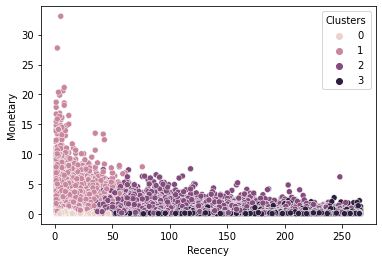

In [49]:
sns.scatterplot(x=rfm.Recency,y=rfm.Monetary,hue=rfm.Clusters)

<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

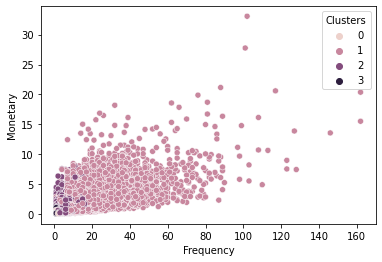

In [50]:
sns.scatterplot(x=rfm.Frequency,y=rfm.Monetary,hue=rfm.Clusters)

In [51]:
rfm.groupby('Clusters')[['Recency','Frequency','Monetary']].mean()

,Recency,Frequency,Monetary
Clusters,,,
0,22.513007,1.617129,0.154395
1,13.426728,8.769257,1.078294
2,87.843612,3.737097,0.457366
3,153.388550,1.167788,0.108425


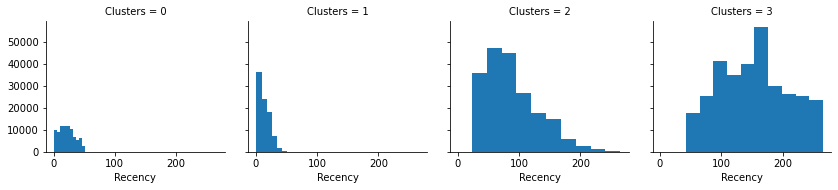

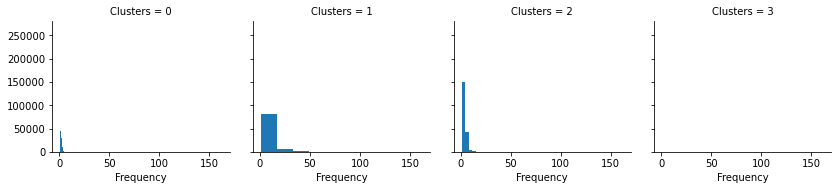

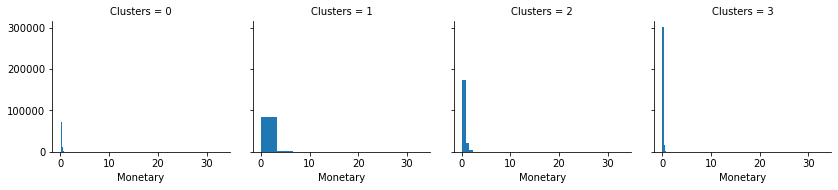

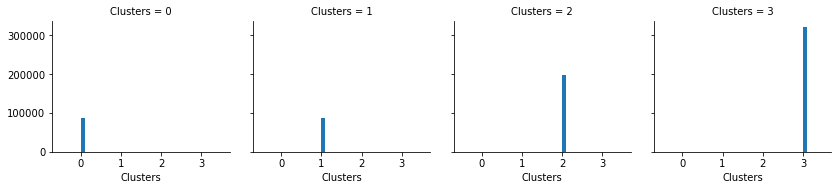

In [52]:
for c in rfm:
    grid = sns.FacetGrid(rfm, col='Clusters')
    grid.map(plt.hist, c)
    grid.tight_layout(pad=2.0)

### Labeling R F dan M score

Menentukan angka 1 2 3 4 menggunakan quantiles masing - masing recency, frequency, dan monetary

In [53]:
# Create the quartiles scores
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles.drop('Clusters',axis=1,inplace=True)
quantiles

,Recency,Frequency,Monetary
0.25,37.0,1.0,0.069017
0.50,91.0,2.0,0.160949
0.75,156.0,3.0,0.379458


In [54]:
def RFMScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [55]:
def RFMScore_Recency(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

Labeling R F M pada tabel rfm

In [56]:
rfm['R'] = rfm['Recency'].apply(RFMScore_Recency, args=('Recency', quantiles,))
rfm['F'] = rfm['Frequency'].apply(RFMScore, args=('Frequency', quantiles,))
rfm['M'] = rfm['Monetary'].apply(RFMScore, args=('Monetary', quantiles,))

In [57]:
rfm

,Recency,Frequency,Monetary,Clusters,R,F,M
customer_id,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,186,1,0.093644,3,1,1,2
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,154,4,0.787593,2,2,4,4
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,4,0.559085,1,4,4,4
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,2,0.255814,2,3,2,3
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,1,0.076237,0,4,1,2
...,...,...,...,...,...,...,...
ffff8f9ecdce722b5bab97fff68a6d1866492209bfe5242c50d2a10a652fb5ef,113,1,0.135542,3,2,1,2
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,41,3,0.374305,2,3,3,3
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,158,6,0.790271,2,1,4,4


Melihat hasil `RFM_Score` dari hasil penjumlahan R F M

In [58]:
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

In [59]:
rfm

,Recency,Frequency,Monetary,Clusters,R,F,M,RFM_Score
customer_id,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,186,1,0.093644,3,1,1,2,4
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,154,4,0.787593,2,2,4,4,10
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,4,0.559085,1,4,4,4,12
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,2,0.255814,2,3,2,3,8
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,1,0.076237,0,4,1,2,7
...,...,...,...,...,...,...,...,...
ffff8f9ecdce722b5bab97fff68a6d1866492209bfe5242c50d2a10a652fb5ef,113,1,0.135542,3,2,1,2,5
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,41,3,0.374305,2,3,3,3,9
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,158,6,0.790271,2,1,4,4,9


### Melihat distribusi RFM Score untuk masing - masing cluster

<AxesSubplot:xlabel='RFM_Score', ylabel='Count'>

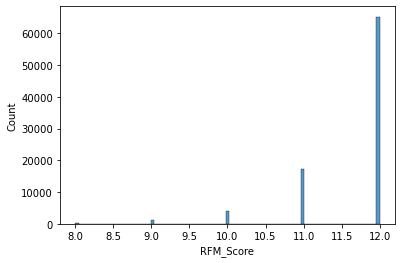

In [60]:
sns.histplot(data=rfm[rfm['Clusters']==1],x='RFM_Score')

<AxesSubplot:xlabel='RFM_Score', ylabel='Count'>

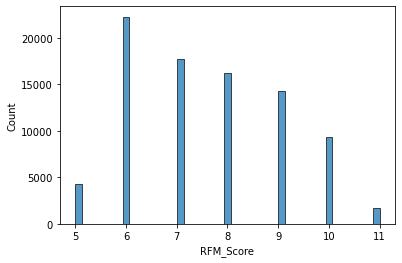

In [61]:
sns.histplot(data=rfm[rfm['Clusters']==0],x='RFM_Score')

<AxesSubplot:xlabel='RFM_Score', ylabel='Count'>

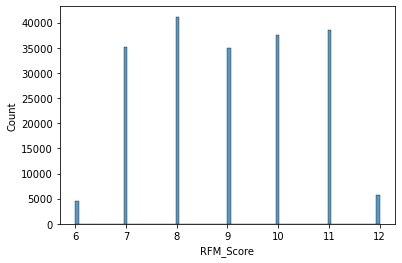

In [62]:
sns.histplot(data=rfm[rfm['Clusters']==2],x='RFM_Score')

<AxesSubplot:xlabel='RFM_Score', ylabel='Count'>

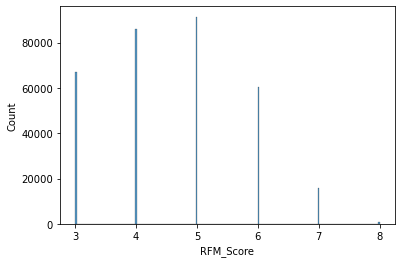

In [63]:
sns.histplot(data=rfm[rfm['Clusters']==3],x='RFM_Score')

### Membuat kolom Score

In [64]:
rfm['Score'] = 'Bronze'
rfm.loc[rfm['RFM_Score']>6,'Score'] = 'Silver' 
rfm.loc[rfm['RFM_Score']>10,'Score'] = 'Gold'  

In [65]:
rfm

,Recency,Frequency,Monetary,Clusters,R,F,M,RFM_Score,Score
customer_id,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,186,1,0.093644,3,1,1,2,4,Bronze
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,154,4,0.787593,2,2,4,4,10,Silver
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,4,0.559085,1,4,4,4,12,Gold
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,2,0.255814,2,3,2,3,8,Silver
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,1,0.076237,0,4,1,2,7,Silver
...,...,...,...,...,...,...,...,...,...
ffff8f9ecdce722b5bab97fff68a6d1866492209bfe5242c50d2a10a652fb5ef,113,1,0.135542,3,2,1,2,5,Bronze
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,41,3,0.374305,2,3,3,3,9,Silver
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,158,6,0.790271,2,1,4,4,9,Silver


Melihat korelasi score, dengan clusters

In [66]:
pd.crosstab(rfm.Clusters,rfm.Score)

Score,Bronze,Gold,Silver
Clusters,,,
0,26566,1685,57590
1,0,82427,5294
2,4587,44354,149022
3,304599,0,16621


### Membuat segmentasi yang lebih user-friendly

In [67]:
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][2-3]': 'At risk',
    r'[1-2]4': 'Can\'t loose them',
    r'2[1-2]': 'About to sleep',
    r'22': 'Need attention',
    r'[2-3][3-4]': 'Loyal customers',
    r'31': 'Promising',
    r'41': 'New customers',
    r'[3-4][1-2]': 'Potential loyalists',
    r'4[3-4]': 'Champions'
}

In [68]:
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

In [69]:
rfm

,Recency,Frequency,Monetary,Clusters,R,F,M,RFM_Score,Score,Segment
customer_id,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,186,1,0.093644,3,1,1,2,4,Bronze,Hibernating
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,154,4,0.787593,2,2,4,4,10,Silver,Can't loose them
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,4,0.559085,1,4,4,4,12,Gold,Champions
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,2,0.255814,2,3,2,3,8,Silver,Potential loyalists
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,1,0.076237,0,4,1,2,7,Silver,New customers
...,...,...,...,...,...,...,...,...,...,...
ffff8f9ecdce722b5bab97fff68a6d1866492209bfe5242c50d2a10a652fb5ef,113,1,0.135542,3,2,1,2,5,Bronze,Hibernating
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,41,3,0.374305,2,3,3,3,9,Silver,Loyal customers
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,158,6,0.790271,2,1,4,4,9,Silver,Can't loose them


### Bagaimana hasil peng-clusteran dengan kondisi segmentasinya ?

### Cluster 1 : Top of the top

In [70]:
x1 = rfm[rfm['Clusters']==1].Segment.value_counts()
x1

Champions              84499
Potential loyalists     1757
Loyal customers         1457
New customers              8
Name: Segment, dtype: int64

### Cluster 2 : Comeback Customer ?

In [71]:
x2 = rfm[rfm['Clusters']==2].Segment.value_counts()
x2

Loyal customers        75478
Potential loyalists    29243
At risk                27733
Hibernating            27307
Can't loose them       22508
Champions              15388
Promising                306
Name: Segment, dtype: int64

### Cluster 0 : Potential Customer

In [72]:
x0 = rfm[rfm['Clusters']==0].Segment.value_counts()
x0

New customers          36275
Potential loyalists    28817
Champions              11406
Promising               9301
Loyal customers           42
Name: Segment, dtype: int64

### Cluster 3 : Far far away

In [73]:
x3 = rfm[rfm['Clusters']==3].Segment.value_counts()
x3

Hibernating            265288
Promising               48374
Potential loyalists      6774
At risk                   775
Loyal customers             9
Name: Segment, dtype: int64

In [75]:
rfm_reset = rfm.reset_index()
rfm_reset

,customer_id,Recency,Frequency,Monetary,Clusters,R,F,M,RFM_Score,Score,Segment
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,186,1,0.093644,3,1,1,2,4,Bronze,Hibernating
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,154,4,0.787593,2,2,4,4,10,Silver,Can't loose them
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,8,4,0.559085,1,4,4,4,12,Gold,Champions
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,42,2,0.255814,2,3,2,3,8,Silver,Potential loyalists
4,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,9,1,0.076237,0,4,1,2,7,Silver,New customers
...,...,...,...,...,...,...,...,...,...,...,...
692740,ffff8f9ecdce722b5bab97fff68a6d1866492209bfe524...,113,1,0.135542,3,2,1,2,5,Bronze,Hibernating
692741,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,41,3,0.374305,2,3,3,3,9,Silver,Loyal customers
692742,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,158,6,0.790271,2,1,4,4,9,Silver,Can't loose them
692743,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,15,2,0.077864,0,4,2,2,8,Silver,Potential loyalists


In [74]:
rfm_reset.to_csv('rfm_2020.csv')